# Candlestick Inverted Hammer

https://commodity.com/technical-analysis/inverted-hammer/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2016-01-01'
end = '2021-10-08'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,2.77,2.82,2.63,2.77,2.77,32516800
2016-01-05,2.77,2.80,2.64,2.75,2.75,12972300
2016-01-06,2.66,2.71,2.47,2.51,2.51,23759400
2016-01-07,2.43,2.48,2.26,2.28,2.28,22203500
2016-01-08,2.36,2.42,2.10,2.14,2.14,31822400


## Candlestick with Inverted Hammer

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,735967.0,2.77,2.82,2.63,2.77,2.77,32516800,False
1,735968.0,2.77,2.80,2.64,2.75,2.75,12972300,False
2,735969.0,2.66,2.71,2.47,2.51,2.51,23759400,False
3,735970.0,2.43,2.48,2.26,2.28,2.28,22203500,False
4,735971.0,2.36,2.42,2.10,2.14,2.14,31822400,False


Text(0, 0.5, 'Price')

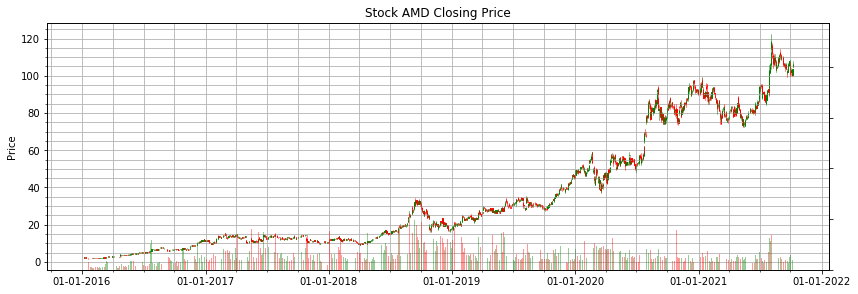

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
inverted_hammer = talib.CDLINVERTEDHAMMER(df['Open'], df['High'], df['Low'], df['Close'])

inverted_hammer = inverted_hammer[inverted_hammer != 0]

In [6]:
df['inverted_hammer'] = talib.CDLINVERTEDHAMMER(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['inverted_hammer'] !=0]

,Open,High,Low,Close,Adj Close,Volume,inverted_hammer
Date,,,,,,,
2017-08-17,12.460000,12.650000,12.320000,12.340000,12.340000,47371000,100
2017-10-06,13.220000,13.390000,13.180000,13.230000,13.230000,28258700,100
2017-10-17,14.240000,14.350000,14.140000,14.160000,14.160000,28995600,100
2018-03-28,9.990000,10.170000,9.790000,9.810000,9.810000,64832100,100
2018-09-07,26.959999,28.270000,26.799999,27.379999,27.379999,123348700,100
2019-05-31,27.570000,28.360001,27.400000,27.410000,27.410000,68667800,100
2019-06-12,32.000000,32.570000,31.920000,32.180000,32.180000,56298700,100
2019-11-29,39.099998,39.520000,39.020000,39.150002,39.150002,17609900,100
2020-03-16,39.080002,43.369999,38.509998,38.709999,38.709999,84545900,100


In [8]:
df['Adj Close'].loc[df['inverted_hammer'] !=0]

Date
2017-08-17     12.340000
2017-10-06     13.230000
2017-10-17     14.160000
2018-03-28      9.810000
2018-09-07     27.379999
2019-05-31     27.410000
2019-06-12     32.180000
2019-11-29     39.150002
2020-03-16     38.709999
2020-09-08     78.690002
2020-10-02     81.800003
2021-03-24     76.480003
2021-08-06    110.110001
Name: Adj Close, dtype: float64

In [9]:
df['Adj Close'].loc[df['inverted_hammer'] !=0].index

DatetimeIndex(['2017-08-17', '2017-10-06', '2017-10-17', '2018-03-28',
               '2018-09-07', '2019-05-31', '2019-06-12', '2019-11-29',
               '2020-03-16', '2020-09-08', '2020-10-02', '2021-03-24',
               '2021-08-06'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
inverted_hammer

Date
2017-08-17    100
2017-10-06    100
2017-10-17    100
2018-03-28    100
2018-09-07    100
2019-05-31    100
2019-06-12    100
2019-11-29    100
2020-03-16    100
2020-09-08    100
2020-10-02    100
2021-03-24    100
2021-08-06    100
dtype: int32

In [11]:
inverted_hammer.index

DatetimeIndex(['2017-08-17', '2017-10-06', '2017-10-17', '2018-03-28',
               '2018-09-07', '2019-05-31', '2019-06-12', '2019-11-29',
               '2020-03-16', '2020-09-08', '2020-10-02', '2021-03-24',
               '2021-08-06'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,inverted_hammer
Date,,,,,,,
2016-01-04,2.770000,2.820000,2.630000,2.770000,2.770000,32516800,0
2016-01-05,2.770000,2.800000,2.640000,2.750000,2.750000,12972300,0
2016-01-06,2.660000,2.710000,2.470000,2.510000,2.510000,23759400,0
2016-01-07,2.430000,2.480000,2.260000,2.280000,2.280000,22203500,0
2016-01-08,2.360000,2.420000,2.100000,2.140000,2.140000,31822400,0
...,...,...,...,...,...,...,...
2021-10-01,102.599998,103.000000,100.639999,102.449997,102.449997,41491600,0
2021-10-04,101.739998,101.849998,99.820000,100.339996,100.339996,41967100,0
2021-10-05,100.919998,102.870003,100.610001,101.809998,101.809998,31455200,0


Text(0, 0.5, 'Price')

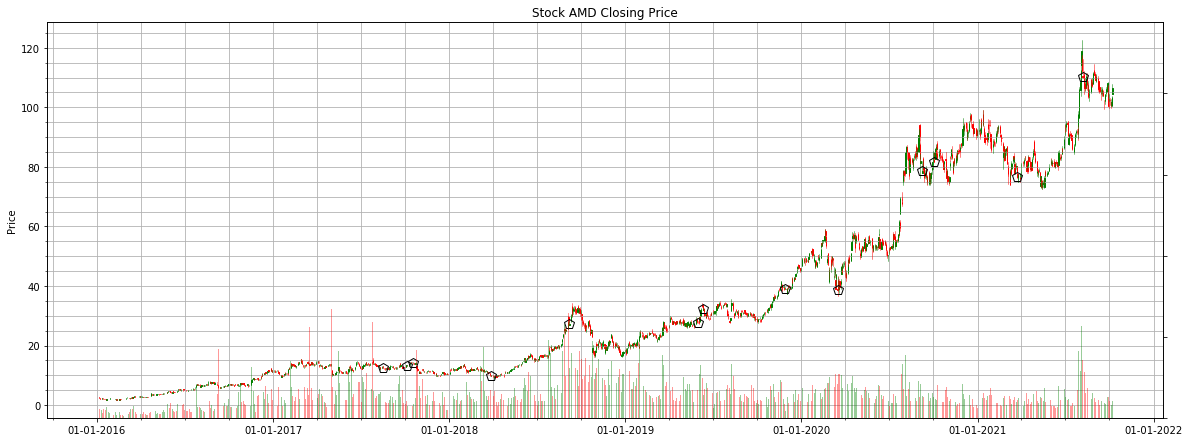

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['inverted_hammer'] !=0].index, df['Adj Close'].loc[df['inverted_hammer'] !=0],
                'pk', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-08-01':'2021-09-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,inverted_hammer,VolumePositive
0,738004.0,105.930000,110.330002,103.830002,108.629997,108.629997,115581900,0,True
1,738005.0,108.150002,114.849998,107.660004,112.559998,112.559998,157723100,0,True
2,738006.0,114.360001,122.489998,114.160004,118.769997,118.769997,225368700,0,True
3,738007.0,116.629997,117.680000,111.589996,112.349998,112.349998,137860900,0,False
4,738008.0,110.550003,116.260002,109.699997,110.110001,110.110001,143792800,100,False


Text(0, 0.5, 'Price')

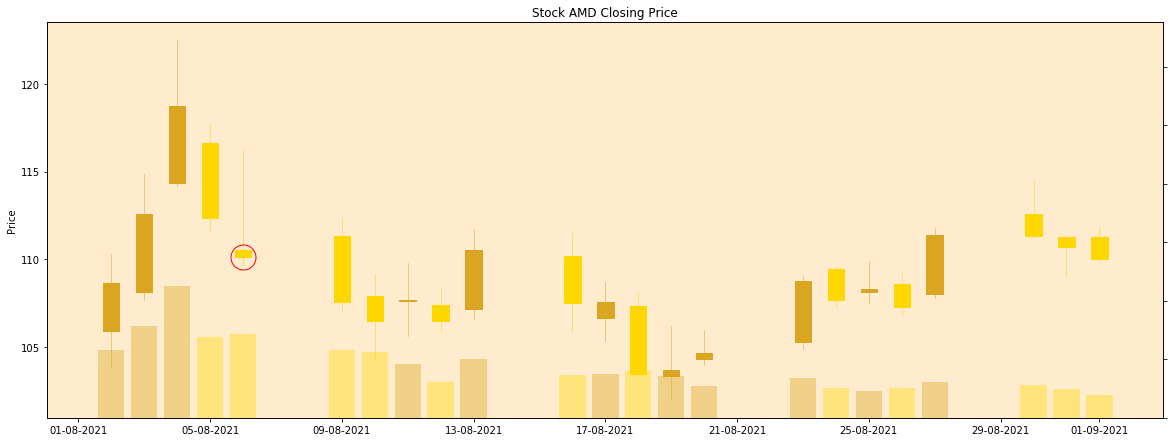

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('blanchedalmond')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='goldenrod', colordown='gold', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['inverted_hammer'] !=0].index, df['Adj Close'].loc[df['inverted_hammer'] !=0],
                'or', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=25.0) 
colors = dfc.VolumePositive.map({True: 'goldenrod', False: 'gold'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

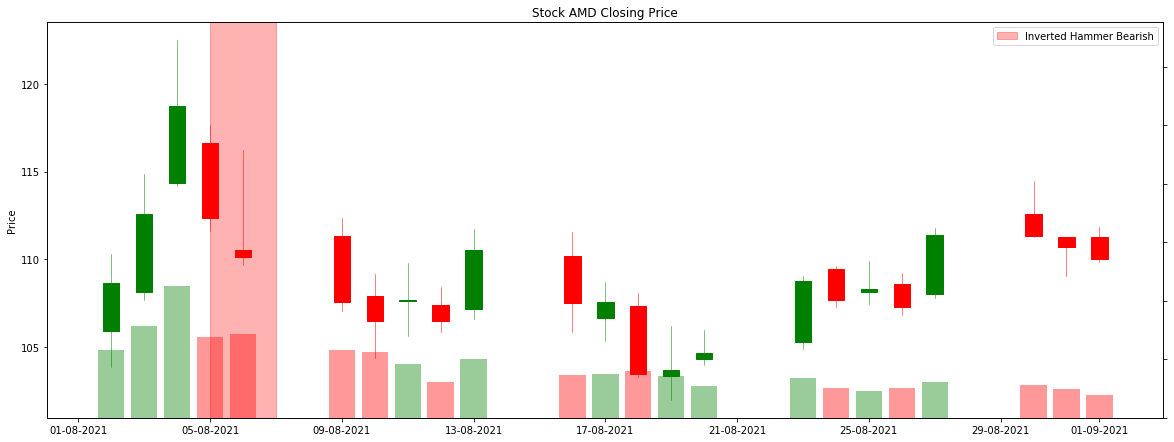

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,8,5)), date2num(datetime(2021,8,7)), 
           label="Inverted Hammer Bearish",color="red", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')